In [1]:
import pandas as pd

In [2]:
user_raw = pd.read_csv('../dataset/spotify_dataset.csv',on_bad_lines='skip')
song_raw = pd.read_csv('../dataset/spotify_millsongdata.csv')
user_raw.columns = user_raw.columns.str.replace('"', '').str.strip()
song_raw = song_raw.drop('link', axis=1)

In [3]:
song_raw

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...
...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...


In [4]:
user_raw

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891675,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891676,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891677,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891678,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [5]:
merge_df = pd.merge(user_raw, song_raw, how='left', left_on=['trackname', 'artistname'], right_on=['song', 'artist'])
merge_df = merge_df.dropna()
merge_df = merge_df.drop_duplicates()
merge_df.reset_index(drop=True, inplace=True)
merge_df = merge_df.drop(columns=['artist', 'song','text'])
merge_df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Band On The Run,HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Dance Tonight,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Don't Dream It's Over,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Fall At Your Feet,HARD ROCK 2010
...,...,...,...,...
980823,2302bf9c64dc63d88a750215ed187f2c,Soundgarden,The Day I Tried To Live,iPhone
980824,2302bf9c64dc63d88a750215ed187f2c,Def Leppard,Too Late For Love,iPhone
980825,2302bf9c64dc63d88a750215ed187f2c,Jimi Hendrix,Voodoo Child (Slight Return),iPhone
980826,2302bf9c64dc63d88a750215ed187f2c,Metallica,Welcome Home (Sanitarium),iPhone


# Data preprocessing

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r'\r\n', ' ', text)
    text = text.lower()
    text = re.sub(r'[^\w\s\'-]', '', text) 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11580\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\11580\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
song_raw['text1'] = song_raw['text'].apply(preprocess_text)

In [9]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

train_df = pd.DataFrame()
test_df = pd.DataFrame()

user_groups = merge_df.groupby('user_id')
total_groups = len(user_groups)

for user_id, user_data in tqdm(user_groups, total=total_groups, desc="Processing users"):
    if len(user_data) > 1:
        train_data, test_data = train_test_split(user_data, test_size=0.4, random_state=42)
        train_df = pd.concat([train_df, train_data])
        test_df = pd.concat([test_df, test_data])

Processing users: 100%|██████████| 13730/13730 [05:54<00:00, 38.74it/s]


In [10]:
train_df = pd.merge(train_df, song_raw, how='left', left_on=['trackname', 'artistname'], right_on=['song', 'artist'])
train_df = train_df.dropna()
train_df = train_df.drop_duplicates()
train_df.reset_index(drop=True, inplace=True)
train_df

,user_id,artistname,trackname,playlistname,artist,song,text,text1
0,00055176fea33f6e027cd3302289378b,Maroon 5,Animals,favs,Maroon 5,Animals,"[Chorus] \r\nBaby I'm preying on you tonight,...",choru babi 'm prey tonight hunt eat aliv like ...
1,00055176fea33f6e027cd3302289378b,Little Mix,Boy,favs,Little Mix,Boy,"Do you remember what he said? \r\nI do, he to...",rememb said told 'd never ever hurt oh go anot...
2,00055176fea33f6e027cd3302289378b,Ed Sheeran,All Of The Stars,favs,Ed Sheeran,All Of The Stars,"It's just another night, and I'm staring at th...",'s anoth night 'm stare moon saw shoot star th...
3,00055176fea33f6e027cd3302289378b,Demi Lovato,La La Land,favs,Demi Lovato,La La Land,"I am confident, but \r\nI still have my momen...",confid still moment babi 's 'm supermodel stil...
4,00055176fea33f6e027cd3302289378b,Ed Sheeran,Thinking Out Loud,favs,Ed Sheeran,Thinking Out Loud,[Verse 1] \r\nWhen your legs don't work like ...,vers 1 leg n't work like use ca n't sweep feet...
...,...,...,...,...,...,...,...,...
582879,fff77dadf8528083c920b9c018847e8b,Fall Out Boy,I've Got All This Ringing In My Ears And None ...,Liked from Radio,Fall Out Boy,I've Got All This Ringing In My Ears And None ...,You're a canary \r\nI'm a coal mine \r\n'Cau...,'re canari 'm coal mine 'caus sorrow rage take...
582880,fff77dadf8528083c920b9c018847e8b,Lana Del Rey,Lolita,Liked from Radio,Lana Del Rey,Lolita,Would you be mine? \r\nWould you be my baby t...,would mine would babi tonight could kiss fruit...
582881,fff77dadf8528083c920b9c018847e8b,Lana Del Rey,Cola,Liked from Radio,Lana Del Rey,Cola,My pussy tastes like Pepsi Cola \r\nMy eyes a...,pussi tast like pepsi cola eye wide like cherr...
582882,fff77dadf8528083c920b9c018847e8b,Mariah Carey,Hero,Liked from Radio,Mariah Carey,Hero,There's a hero \r\nIf you look inside your he...,'s hero look insid heart n't proud 's answer r...


In [11]:
test_df = pd.merge(test_df, song_raw, how='left', left_on=['trackname', 'artistname'], right_on=['song', 'artist'])
test_df = test_df.dropna()
test_df = test_df.drop_duplicates()
test_df.reset_index(drop=True, inplace=True)
test_df

,user_id,artistname,trackname,playlistname,artist,song,text,text1
0,00055176fea33f6e027cd3302289378b,Ed Sheeran,Friends,favs,Ed Sheeran,Friends,"We're not, no we're not friends, nor have we e...",'re 're friend ever tri keep secret live find ...
1,00055176fea33f6e027cd3302289378b,OneRepublic,I Lived,favs,OneRepublic,I Lived,Hoping you take that jump \r\nBut don't fear ...,hope take jump n't fear fall hope water rise b...
2,00055176fea33f6e027cd3302289378b,Avril Lavigne,Girlfriend,favs,Avril Lavigne,Girlfriend,"[Chorus] \r\nHey, hey \r\nYou, you \r\nI do...",choru hey hey n't like girlfriend way way thin...
3,00055176fea33f6e027cd3302289378b,Little Mix,They Just Don't Know You,favs,Little Mix,They Just Don't Know You,(JADE) \r\nDaddy doesn't think \r\nThat you'...,jade daddi n't think 'll good enough mama say ...
4,00055176fea33f6e027cd3302289378b,Green Day,21 Guns,favs,Green Day,21 Guns,"Do you know what's worth fighting for, \r\nWh...",know 's worth fight 's worth die take breath a...
...,...,...,...,...,...,...,...,...
397228,fff77dadf8528083c920b9c018847e8b,Fall Out Boy,"Dance, Dance",Liked from Radio,Fall Out Boy,"Dance, Dance",She says she's no good with words but I'm wors...,say 's good word 'm wors bare stutter joke rom...
397229,fff77dadf8528083c920b9c018847e8b,Lil Wayne,How To Love,Liked from Radio,Lil Wayne,How To Love,"Turn the music up \r\nA lil' louder, yeah \r...",turn music lil ' louder yeah lot crook try'na ...
397230,fff77dadf8528083c920b9c018847e8b,Maroon 5,Harder To Breathe,Liked from Radio,Maroon 5,Harder To Breathe,How dare you say that my behavior is unaccepta...,dare say behavior unaccept condescend unnecess...
397231,fff77dadf8528083c920b9c018847e8b,Fall Out Boy,The (After) Life Of The Party,Liked from Radio,Fall Out Boy,The (After) Life Of The Party,I'm a stitch away from making it \r\nAnd a sc...,'m stitch away make scar away fall apart apart...


In [12]:
tfidf = TfidfVectorizer(
    max_df=0.80,  
    min_df=100,  
    max_features=10000
)
tfidf.fit_transform(song_raw['text1'])

<57650x3056 sparse matrix of type '<class 'numpy.float64'>'
	with 3112049 stored elements in Compressed Sparse Row format>

In [13]:
grouped_df = train_df.groupby('user_id').agg({
    'text1': ' '.join
}).reset_index()
grouped_df['index'] = grouped_df.index
grouped_df

,user_id,text1,index
0,00055176fea33f6e027cd3302289378b,choru babi 'm prey tonight hunt eat aliv like ...,0
1,0007f3dd09c91198371454c608d47f22,paint nail black dye hair darker shade brown '...,1
2,000b0f32b5739f052b9d40fcc5c41079,today child born earth today child born earth ...,2
3,000c11a16c89aa4b14b328080f5954ee,girl hey hey inspir compass spinnin ' babi 's ...,3
4,00123e0f544dee3ab006aa7f1e5725a7,oh never done never wan na long turn dusti roa...,4
...,...,...,...
13014,ffe11226cdea81a2db9262c0ec7f5d71,noth suffoc pass everyday human event isol oxy...,13014
13015,ffe32d5412269f3041c58cbf0dde3306,like see boogi right across floor like till ho...,13015
13016,fff60baf392613ed33f745b89a9b38f7,routin bite hard ambit low resent ride high em...,13016
13017,fff616055993498d6127f3f467cf9f2b,close enough start war floor god know 're figh...,13017


In [14]:
tfidf_text1_y = tfidf.transform(grouped_df['text1'])

In [15]:
merged_train = pd.merge(train_df, grouped_df, how='left', left_on=['user_id'], right_on=['user_id'])
def similarity(row):
    tfidf_text1_x = tfidf.transform([row['text1_x']])
    similarity_score = cosine_similarity(tfidf_text1_x, tfidf_text1_y[int(row['index'])]).flatten()[0]
    return similarity_score
merged_train['similarity'] = merged_train.apply(lambda row: similarity(row), axis=1)

In [16]:
similarity_threshold = merged_train.groupby('user_id')['similarity'].mean().reset_index()
similarity_sd = merged_train.groupby('user_id')['similarity'].std().reset_index()
grouped_df = pd.merge(grouped_df, similarity_threshold, how='left', left_on=['user_id'], right_on=['user_id'])
grouped_df = pd.merge(grouped_df, similarity_sd, how='left', left_on=['user_id'], right_on=['user_id'])
grouped_df = grouped_df.rename(columns={'similarity_x': 'mean','similarity_y': 'sd'})
grouped_df.to_csv('../dataset/grouped_df.csv', index=False)

In [17]:
grouped_df = pd.read_csv('../dataset/grouped_df.csv')

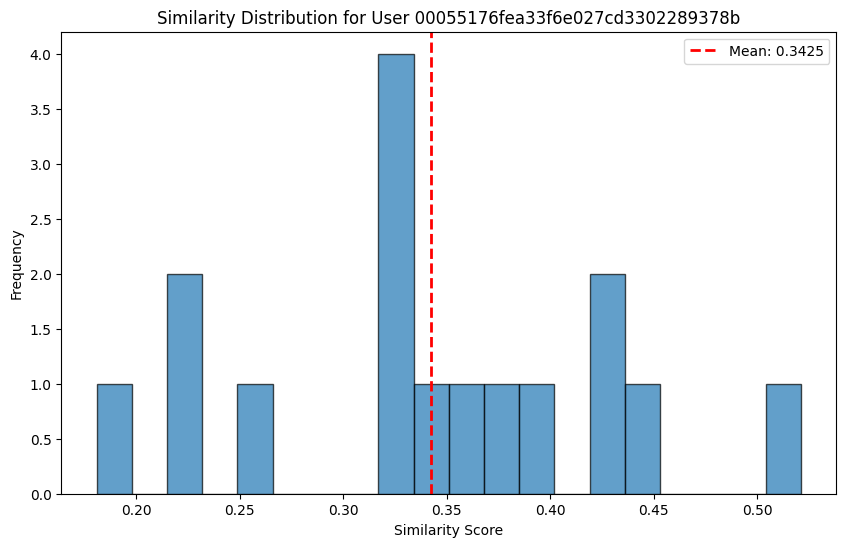

In [18]:
import matplotlib.pyplot as plt


first_user_id = merged_train['user_id'].iloc[10]
first_user_data = merged_train[merged_train['user_id'] == first_user_id]

similarity_scores = first_user_data['similarity']
mean_similarity = similarity_scores.mean()
plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title(f'Similarity Distribution for User {first_user_id}')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

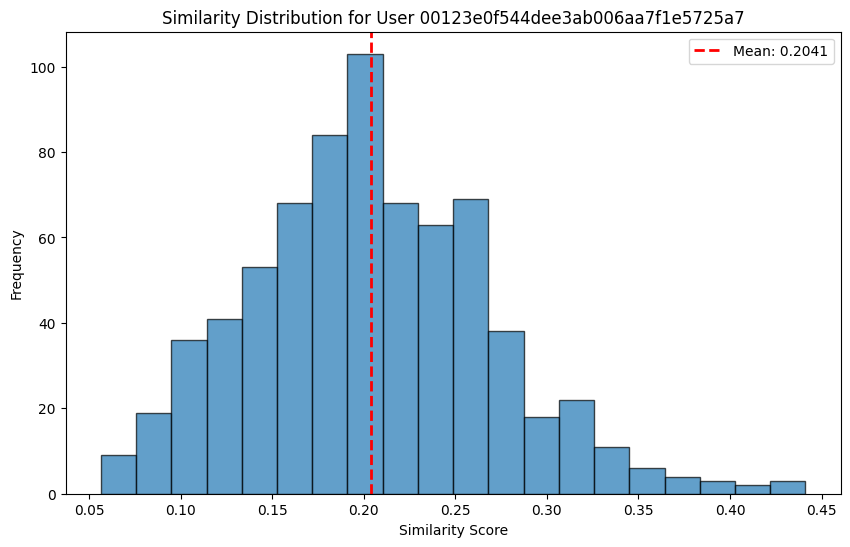

In [19]:
import matplotlib.pyplot as plt


first_user_id = merged_train['user_id'].iloc[100]
first_user_data = merged_train[merged_train['user_id'] == first_user_id]

similarity_scores = first_user_data['similarity']
mean_similarity = similarity_scores.mean()
plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title(f'Similarity Distribution for User {first_user_id}')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

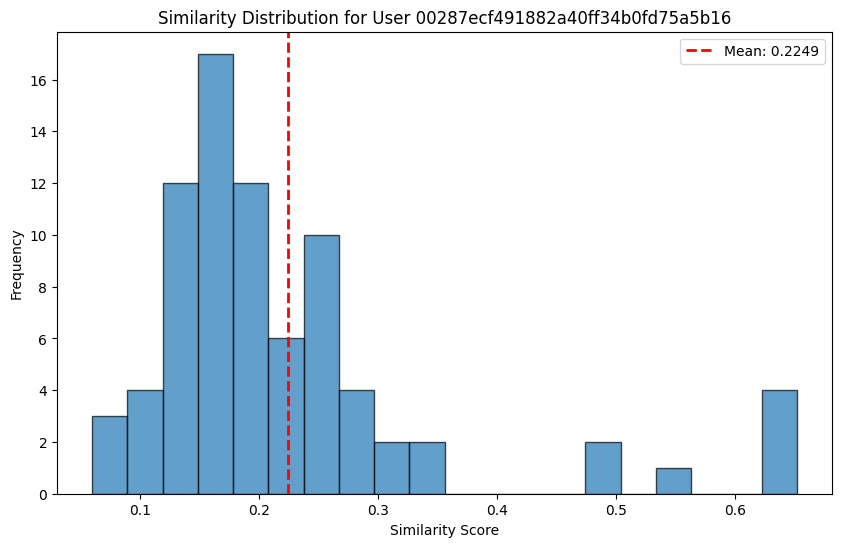

In [20]:
import matplotlib.pyplot as plt


first_user_id = merged_train['user_id'].iloc[1000]
first_user_data = merged_train[merged_train['user_id'] == first_user_id]

similarity_scores = first_user_data['similarity']
mean_similarity = similarity_scores.mean()
plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title(f'Similarity Distribution for User {first_user_id}')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

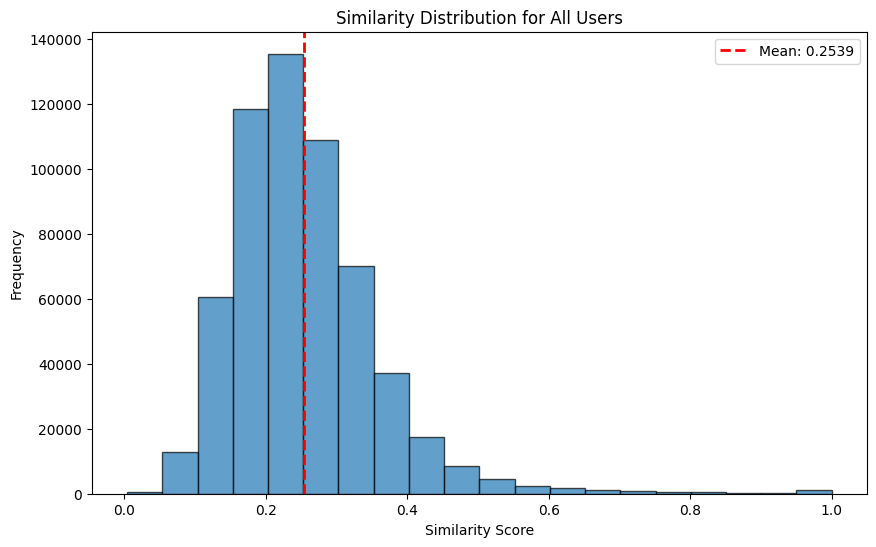

In [21]:
similarity_scores = merged_train['similarity']
mean_similarity = similarity_scores.mean()

plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_similarity:.4f}')
plt.title('Similarity Distribution for All Users')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Top-N Recommendation Method

In [63]:
import numpy as np
test_user_N = 200
np.random.seed(42)
test_user_ids = np.random.choice(grouped_df['user_id'].unique(), size=test_user_N, replace=False)
all_songs = tfidf.transform(song_raw['text1'])


In [64]:


top_N = 100
correct = 0
total_rcmd = 0
total_collect = 0
for id in tqdm(test_user_ids, desc="Processing users"):
    user_collect = train_df[train_df['user_id'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    notcollect_indices = np.where(~song_raw['text'].isin(user_collect['text']))[0]
    profile = tfidf.transform([grouped_df[grouped_df['user_id'] == id]['text1'].values[0]])
    songs = all_songs[notcollect_indices]
    similarity_score = cosine_similarity(songs, profile).flatten()
    user_notcollect['similarity'] = similarity_score
    recommended_songs = user_notcollect.sort_values(by='similarity', ascending=False).head(top_N)
    user_test = test_df[test_df['user_id'] == id]
    
    recommended_songs['actual'] = recommended_songs.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    correct += recommended_songs['actual'].sum()
    total_rcmd += top_N
    total_collect += len(user_test)
    
precision = correct / total_rcmd
recall = correct / total_collect
print("Precision (how many songs liked by user in all recommended):",precision)
print("Recall (how many songs collected by user been recommended):",recall)
print("F1-Score:",2*(precision*recall)/(precision+recall))

Processing users: 100%|██████████| 200/200 [00:26<00:00,  7.50it/s]

Precision (how many songs liked by user in all recommended): 0.0014
Recall (how many songs collected by user been recommended): 0.006359300476947536
F1-Score: 0.0022947998196943


In [66]:
top_N = 50
correct = 0
total_rcmd = 0
total_collect = 0
for id in tqdm(test_user_ids, desc="Processing users"):
    user_collect = train_df[train_df['user_id'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    notcollect_indices = np.where(~song_raw['text'].isin(user_collect['text']))[0]
    profile = tfidf.transform([grouped_df[grouped_df['user_id'] == id]['text1'].values[0]])
    songs = all_songs[notcollect_indices]
    similarity_score = cosine_similarity(songs, profile).flatten()
    user_notcollect['similarity'] = similarity_score
    recommended_songs = user_notcollect.sort_values(by='similarity', ascending=False).head(top_N)
    user_test = test_df[test_df['user_id'] == id]
    
    recommended_songs['actual'] = recommended_songs.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    correct += recommended_songs['actual'].sum()
    total_rcmd += top_N
    total_collect += len(user_test)
    
precision = correct / total_rcmd
recall = correct / total_collect
print("Precision (how many songs liked by user in all recommended):",precision)
print("Recall (how many songs collected by user been recommended):",recall)
print("F1-Score:",2*(precision*recall)/(precision+recall))

Processing users: 100%|██████████| 200/200 [00:26<00:00,  7.49it/s]

Precision (how many songs liked by user in all recommended): 0.0014
Recall (how many songs collected by user been recommended): 0.003179650238473768
F1-Score: 0.0019440394362285637


# Recommend base on similarity distrubution

## Top-N closest to global mean similarity

In [67]:
similarity_scores = merged_train['similarity']
global_mean_similarity = similarity_scores.mean()
global_mean_similarity

0.25394890289868666

In [68]:
top_N = 100
correct = 0
total_rcmd = 0
total_collect = 0
for id in tqdm(test_user_ids, desc="Processing users"):
    user_collect = train_df[train_df['user_id'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    notcollect_indices = np.where(~song_raw['text'].isin(user_collect['text']))[0]
    profile = tfidf.transform([grouped_df[grouped_df['user_id'] == id]['text1'].values[0]])
    songs = all_songs[notcollect_indices]
    similarity_score = cosine_similarity(songs, profile).flatten()
    user_notcollect['similarity'] = similarity_score
    user_notcollect['dist_to_mean'] = abs(user_notcollect['similarity']-global_mean_similarity)
    recommended_songs = user_notcollect.sort_values(by='dist_to_mean', ascending=True).head(top_N)
    user_test = test_df[test_df['user_id'] == id]
    
    recommended_songs['actual'] = recommended_songs.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    correct += recommended_songs['actual'].sum()
    total_rcmd += top_N
    total_collect += len(user_test)
    
precision = correct / total_rcmd
recall = correct / total_collect
print("Precision (how many songs liked by user in all recommended):",precision)
print("Recall (how many songs collected by user been recommended):",recall)
print("F1-Score:",2*(precision*recall)/(precision+recall))

Processing users: 100%|██████████| 200/200 [00:26<00:00,  7.50it/s]

Precision (how many songs liked by user in all recommended): 0.0006
Recall (how many songs collected by user been recommended): 0.0027254144901203725
F1-Score: 0.0009834856370118429


## Top-N closest to local(personal) mean similarity

In [69]:
top_N = 100
correct = 0
total_rcmd = 0
total_collect = 0
for id in tqdm(test_user_ids, desc="Processing users"):
    user_collect = train_df[train_df['user_id'] == id]
    user_notcollect = song_raw[~song_raw['text'].isin(user_collect['text'])].copy()
    notcollect_indices = np.where(~song_raw['text'].isin(user_collect['text']))[0]
    profile = tfidf.transform([grouped_df[grouped_df['user_id'] == id]['text1'].values[0]])
    songs = all_songs[notcollect_indices]
    similarity_score = cosine_similarity(songs, profile).flatten()
    mean_similarity = grouped_df[grouped_df['user_id'] == id]['mean'].values[0]
    user_notcollect['similarity'] = similarity_score
    user_notcollect['dist_to_mean'] = abs(user_notcollect['similarity']-mean_similarity)
    recommended_songs = user_notcollect.sort_values(by='dist_to_mean', ascending=True).head(top_N)
    user_test = test_df[test_df['user_id'] == id]
    
    recommended_songs['actual'] = recommended_songs.apply(
        lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
    )
    correct += recommended_songs['actual'].sum()
    total_rcmd += top_N
    total_collect += len(user_test)
    
precision = correct / total_rcmd
recall = correct / total_collect
print("Precision (how many songs liked by user in all recommended):",precision)
print("Recall (how many songs collected by user been recommended):",recall)
print("F1-Score:",2*(precision*recall)/(precision+recall))

Processing users: 100%|██████████| 200/200 [00:27<00:00,  7.32it/s]

Precision (how many songs liked by user in all recommended): 0.0007
Recall (how many songs collected by user been recommended): 0.003179650238473768
F1-Score: 0.00114739990984715


# User base recommendation

In [56]:
top_N = [100,50,30,20]
correct = [0,0,0,0]
total_rcmd = [0,0,0,0]
total_collect = [0,0,0,0]

In [57]:
all_profiles = tfidf.transform(grouped_df['text1'])
for id in tqdm(test_user_ids, desc="Processing users"):
    profile_index = grouped_df[grouped_df['user_id'] == id].index[0]
    profile = all_profiles[profile_index]
    other_users = grouped_df[~(grouped_df['user_id'] == id)].copy()
    other_profiles = all_profiles[[i for i in range(all_profiles.shape[0]) if i != profile_index]]
    similarity_score = cosine_similarity(other_profiles, profile).flatten()
    other_users['similarity'] = similarity_score
    other_users = other_users.sort_values(by='similarity', ascending=False)
    recommended_songs = pd.DataFrame()
    user_collect = train_df[train_df['user_id'] == id]
    user_test = test_df[test_df['user_id'] == id]
    added = [False,False,False,False]
    for oid in other_users['user_id'].unique():
        other_collect = train_df[train_df['user_id'] == oid].copy()
        user_notcollect = other_collect[~other_collect['text'].isin(user_collect['text'])]
        if len(recommended_songs) > 0:
            user_notcollect = user_notcollect[~user_notcollect['text'].isin(recommended_songs['text'])]
        recommended_songs = pd.concat([recommended_songs, user_notcollect])
        for n in range(len(top_N)):
            if len(recommended_songs) >= top_N[n] and not added[n] :
                recommended_songs = recommended_songs.head(top_N[n])
                recommended_songs['actual'] = recommended_songs.apply(
                    lambda row: 1 if row['text'] in user_test['text'].values else 0, axis=1
                )
                correct[n] += recommended_songs['actual'].sum()
                total_rcmd[n] += top_N[n]
                total_collect[n] += len(user_test)
                added[n] = True
                #print(f"User {id}, top_N {top_N[n]}: Correct = {correct[n]}, Total Rcmd = {total_rcmd[n]}, Total Collect = {total_collect[n]}")
                break
        finished = True
        for add in added:
            if not add:
                finished = False
        if finished:
            break


Processing users: 100%|██████████| 200/200 [01:23<00:00,  2.40it/s]


In [58]:
for n in range(len(top_N)):
    precision = correct[n] / total_rcmd[n] if total_rcmd[n] > 0 else 0
    recall = correct[n] / total_collect[n] if total_collect[n] > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"\nTop N = {top_N[n]}")
    print(f"Precision (how many songs liked by user in all recommended): {precision}")
    print(f"Recall (how many songs collected by user been recommended): {recall}")
    print(f"F1-Score: {f1_score}")


Top N = 100
Precision (how many songs liked by user in all recommended): 0.01875
Recall (how many songs collected by user been recommended): 0.08516920281626164
F1-Score: 0.030733926156620087

Top N = 50
Precision (how many songs liked by user in all recommended): 0.0235
Recall (how many songs collected by user been recommended): 0.05337270043152396
F1-Score: 0.03263209053669375

Top N = 30
Precision (how many songs liked by user in all recommended): 0.027166666666666665
Recall (how many songs collected by user been recommended): 0.03702021349080173
F1-Score: 0.031337114293953666

Top N = 20
Precision (how many songs liked by user in all recommended): 0.03075
Recall (how many songs collected by user been recommended): 0.027935498523733816
F1-Score: 0.029275258836129952


# Hybrids recommend method